In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    !git clone https://github.com/cs357/demos-cs357.git
    !mv demos-cs357/figures/ .
    !mv demos-cs357/additional_files/ .

# Algebraic

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Power functions:

In [ ]:
a = 4
b = -2
x = np.arange(1,1e5)
y = a*x**(b)

In [ ]:
plt.plot(x,y,'-',lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

## Exponential function

In [ ]:
a = 4.0
b = -1.0
x = np.arange(1,100)
y = a**(b*x)

In [ ]:
plt.plot(x,y,'-', lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

## Log functions

In [ ]:
a = 4.0
b = 1.0
x = np.arange(1,100)
y = a*np.log(b*x)

In [ ]:
plt.plot(x,y,'-', lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Exponential, Algebraic, and Geometric Convergence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

params = {'legend.fontsize': 20,
          'figure.figsize': (12, 6),
         'axes.labelsize': 20,
         'axes.titlesize': 20,
         'xtick.labelsize': 20,
         'ytick.labelsize': 20,
         'lines.linewidth': 3}
plt.rcParams.update(params)

#  Make some data

Let's make 3 pieces of data:

* `error1` might represent error that looks like $e\sim n^{-1}$
* `error15` might represent error that looks like $e\sim n^{-1.5}$
* `error2` might represent error that looks like $e\sim n^{-2}$

### What should this look like in linear, log-linear, and log-log?

This is called *algebraic* convergence, with an algebraic index of convergence of $\alpha = 1.0, 1.5, 2.0$, where
$$
e \sim n^{-\alpha}
$$

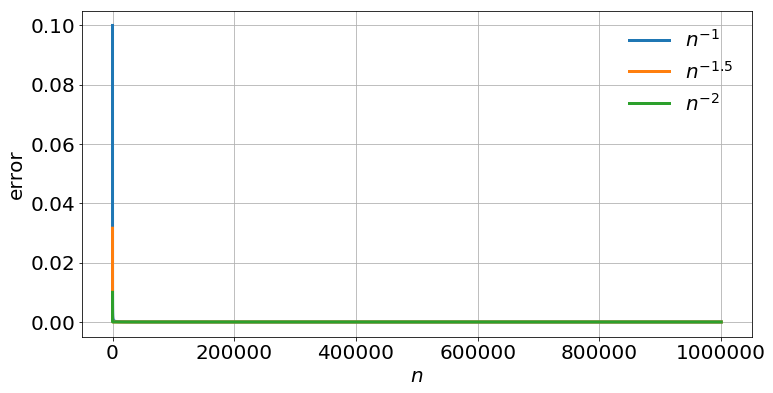

In [4]:
n = np.logspace(1, 6, 100) # evenly distribute numbers over logspace

error1 = 1 / n**1
error15 = 1 / n**1.5
error2 = 1 / n**2

p = plt.plot
p(n, error1, label=r'$n^{-1}$')
p(n, error15, label=r'$n^{-1.5}$')
p(n, error2, label=r'$n^{-2}$')

plt.xlabel('$n$')
plt.ylabel('error')
plt.grid()
plt.legend(frameon=False)

# Think about *faster* convergence than algebraic

Let's make 3 pieces of data:

* `error21` might represent error that looks like $e\sim 2^{-n}$
* `error23` might represent error that looks like $e\sim 2^{-3n}$
* `error2e` might represent error that looks like $e\sim e^{-2n}$

### What should this look like?

Here the algebraic index is unbounded (the error decays fastter than $n^{-\alpha}$ for any $\alpha$).   So we call this **exponential** or **spectral** or a form of **geometric** convergence.

That is
$$
e \sim e^{-\mu n}
$$
for some rate $\mu$ of exponential convergence.

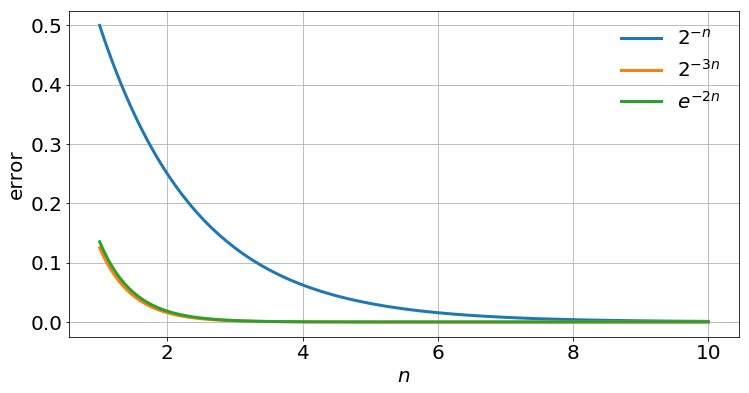

In [7]:
n = np.logspace(0, 1, 100) # evenly distribute numbers over logspace

error21 = 2**-n
error23 = 2**-(3*n)
error2e  = np.exp(-2*n)

p = plt.plot
p(n, error21, label=r'$2^{-n}$')
p(n, error23, label=r'$2^{-3n}$')
p(n, error2e, label=r'$e^{-2n}$')

plt.xlabel('$n$')
plt.ylabel('error')
plt.grid()
plt.legend(frameon=False)

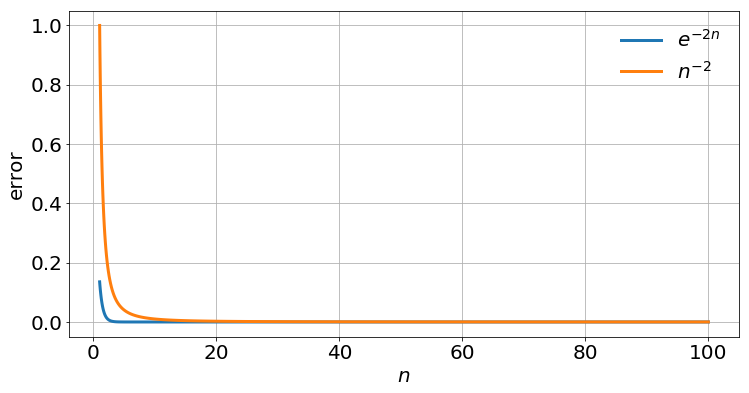

In [11]:
n = np.logspace(0, 2, 100) # evenly distribute numbers over logspace

error2e  = np.exp(-2*n)
error2 = 1 / n**2

p = plt.plot

p(n, error2e, label=r'$e^{-2n}$')
p(n, error2, label=r'$n^{-2}$')

plt.xlabel('$n$')
plt.ylabel('error')
plt.grid()
plt.legend(frameon=False)

# Number and Size of Transistors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Grab some data on transistor size/count

https://en.wikipedia.org/wiki/Transistor_count

In [2]:
from wikitables import import_tables
tables = import_tables('Transistor_count')
print(tables[0])

<WikiTable 'Transistor count[0]'>


## Parse it (ignore this if you wish)

This grabs the data from the Wikipedia article.

In [3]:
def getfloat(value):
    try:
        return float(value)
    except ValueError:
        return 0.0

table = tables[0]

years = [r['Date of introduction'].value for r in table.rows]
process = [r['Process'].value for r in table.rows]
process = [getfloat(p.split()[0].replace(',','')) if p != '' else 0 for p in process]
count = [r['Transistor count'].value for r in table.rows]
count = [c if type(c) is int else 0.0 if len(c.replace(',','').split()) == 0 else [float(di) for di in c.replace(',','').split() if di.isdigit()][0] for c in count]


years = np.array(years)
process = np.array(process)
count = np.array(count)

I = np.where((process!=0) & (count!=0))
years = years[I]
process = process[I]
count = count[I]

# Let's plot it!

## Is this the *best* way to display the data?
## What would you change?

Text(0,0.5,'nm')

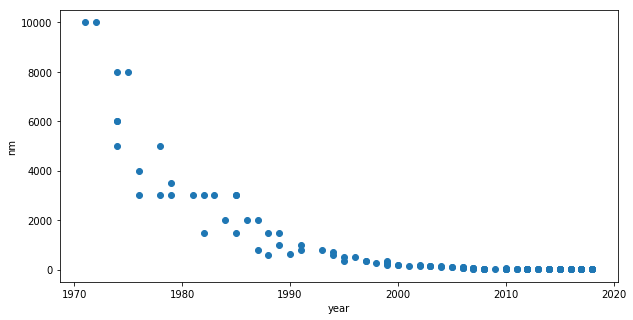

In [4]:
plt.figure(figsize=(10,5))
plt.plot(years, process, 'o')
plt.xlabel('year')
plt.ylabel('nm')

Text(0,0.5,'count')

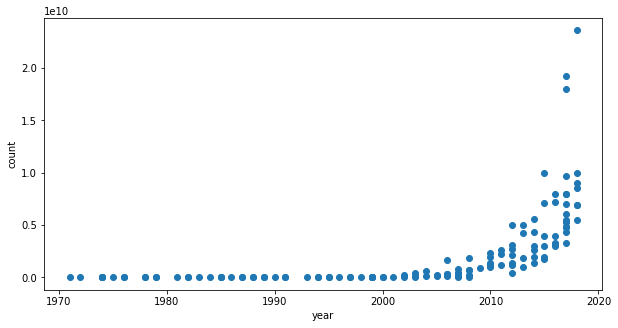

In [5]:
plt.figure(figsize=(10,5))
plt.plot(years, count, 'o') #, basey=2)
plt.xlabel('year')
plt.ylabel('count')

##  Add a slope line
see `polyfit`

Text(0,0.5,'count')

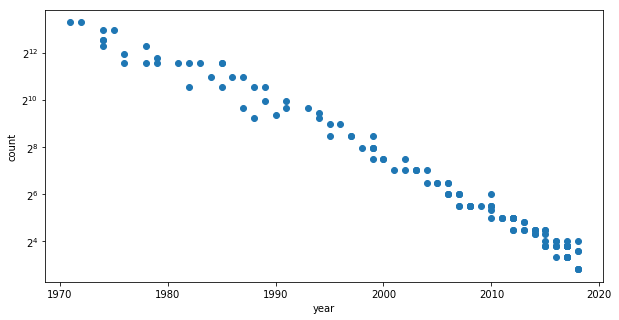

In [6]:
plt.figure(figsize=(10,5))
plt.semilogy(years, process, 'o', basey=2)
plt.xlabel('year')
plt.ylabel('count')

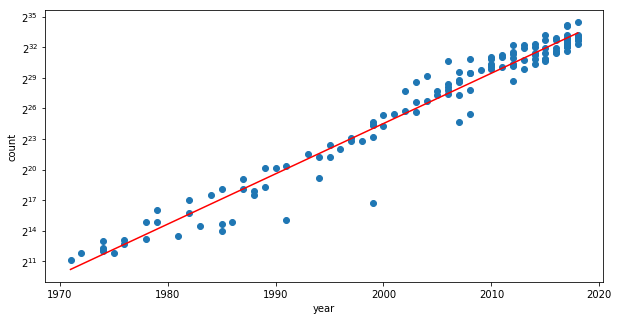

In [7]:
plt.figure(figsize=(10,5))
plt.semilogy(years, count, 'o', basey=2)
plt.xlabel('year')
plt.ylabel('count')

p = np.polyfit(years, np.log2(count), 1)
plt.plot(years, 2**(np.polyval(p, years)), 'r-')
#print(1 / p[0])

## Make it look nice ... with Seaborn

2.02342073473


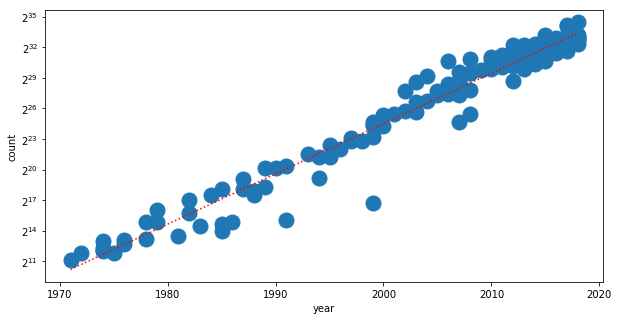

In [46]:
import seaborn as sns
plt.figure(figsize=(10,5))
plt.semilogy(years, count, 'o', basey=2, ms=15)
plt.xlabel('year')
plt.ylabel('count')

p = np.polyfit(years, np.log2(count), 1)
plt.plot(years, 2**(np.polyval(p, years)), color='r', ls=':')
print(1 / p[0])

## increase the font, make a light background

2.02342073473


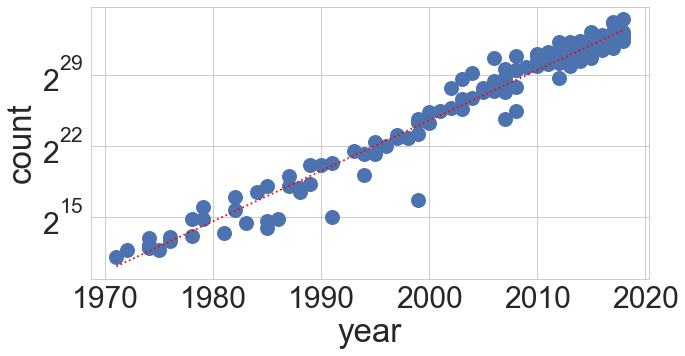

In [47]:
import seaborn as sns
sns.set(font_scale=3)
sns.set_style("whitegrid") 
plt.figure(figsize=(10,5))
plt.semilogy(years, count, 'o', basey=2, ms=15)
plt.xlabel('year')
plt.ylabel('count')

p = np.polyfit(years, np.log2(count), 1)
plt.plot(years, 2**(np.polyval(p, years)), color='r', ls=':')
print(1 / p[0])

## Reset the tick marks

[  8.00000000e+00   1.02400000e+03   1.31072000e+05   1.67772160e+07
   2.14748365e+09   2.74877907e+11   3.51843721e+13]
2.02342073473


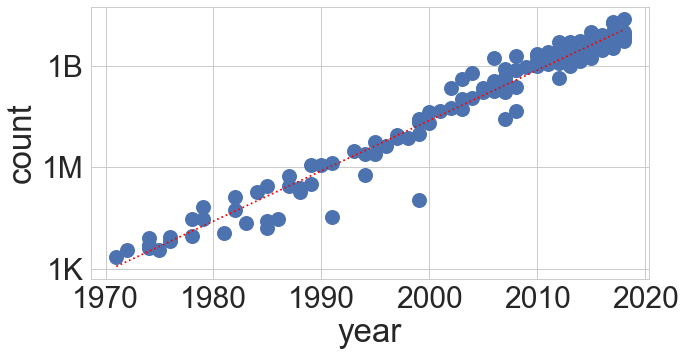

In [48]:
import seaborn as sns
sns.set(font_scale=3)
sns.set_style("whitegrid") 
plt.figure(figsize=(10,5))
plt.semilogy(years, count, 'o', basey=2, ms=15)
plt.xlabel('year')
plt.ylabel('count')

torig = plt.gca().get_yticks()
print(torig)
tnew = [1, 1000, np.int(1e6), np.int(1e9)]
tnewlabel = ['1', '1K', '1M', '1B']
plt.yticks(tnew, tnewlabel)


p = np.polyfit(years, np.log2(count), 1)
plt.plot(years, 2**(np.polyval(p, years)), color='r', ls=':')
print(1 / p[0])

# Algebraic

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Power functions:

In [ ]:
a = 4
b = -2
x = np.arange(1,1e5)
y = a*x**(b)

In [ ]:
plt.plot(x,y,'-',lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

## Exponential function

In [ ]:
a = 4.0
b = -1.0
x = np.arange(1,100)
y = a**(b*x)

In [ ]:
plt.plot(x,y,'-', lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

## Log functions

In [ ]:
a = 4.0
b = 1.0
x = np.arange(1,100)
y = a*np.log(b*x)

In [ ]:
plt.plot(x,y,'-', lw=3)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

# Exponential, Algebraic, and Geometric Convergence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

params = {'legend.fontsize': 20,
          'figure.figsize': (12, 6),
         'axes.labelsize': 20,
         'axes.titlesize': 20,
         'xtick.labelsize': 20,
         'ytick.labelsize': 20,
         'lines.linewidth': 3}
plt.rcParams.update(params)

#  Make some data

Let's make 3 pieces of data:

* `error1` might represent error that looks like $e\sim n^{-1}$
* `error15` might represent error that looks like $e\sim n^{-1.5}$
* `error2` might represent error that looks like $e\sim n^{-2}$

### What should this look like in linear, log-linear, and log-log?

This is called *algebraic* convergence, with an algebraic index of convergence of $\alpha = 1.0, 1.5, 2.0$, where
$$
e \sim n^{-\alpha}
$$

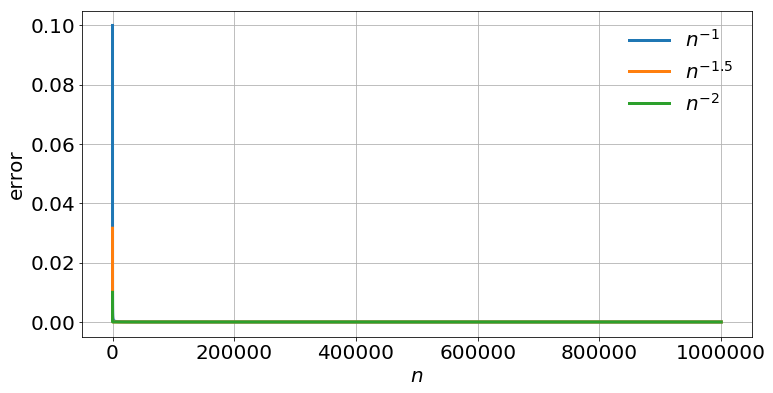

In [4]:
n = np.logspace(1, 6, 100) # evenly distribute numbers over logspace

error1 = 1 / n**1
error15 = 1 / n**1.5
error2 = 1 / n**2

p = plt.plot
p(n, error1, label=r'$n^{-1}$')
p(n, error15, label=r'$n^{-1.5}$')
p(n, error2, label=r'$n^{-2}$')

plt.xlabel('$n$')
plt.ylabel('error')
plt.grid()
plt.legend(frameon=False)

# Think about *faster* convergence than algebraic

Let's make 3 pieces of data:

* `error21` might represent error that looks like $e\sim 2^{-n}$
* `error23` might represent error that looks like $e\sim 2^{-3n}$
* `error2e` might represent error that looks like $e\sim e^{-2n}$

### What should this look like?

Here the algebraic index is unbounded (the error decays fastter than $n^{-\alpha}$ for any $\alpha$).   So we call this **exponential** or **spectral** or a form of **geometric** convergence.

That is
$$
e \sim e^{-\mu n}
$$
for some rate $\mu$ of exponential convergence.

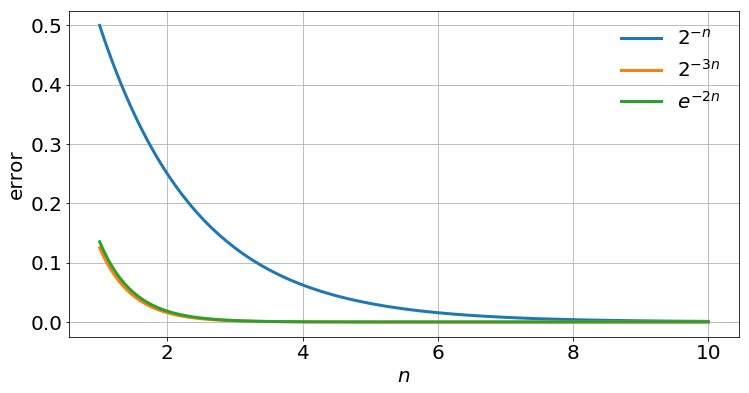

In [7]:
n = np.logspace(0, 1, 100) # evenly distribute numbers over logspace

error21 = 2**-n
error23 = 2**-(3*n)
error2e  = np.exp(-2*n)

p = plt.plot
p(n, error21, label=r'$2^{-n}$')
p(n, error23, label=r'$2^{-3n}$')
p(n, error2e, label=r'$e^{-2n}$')

plt.xlabel('$n$')
plt.ylabel('error')
plt.grid()
plt.legend(frameon=False)

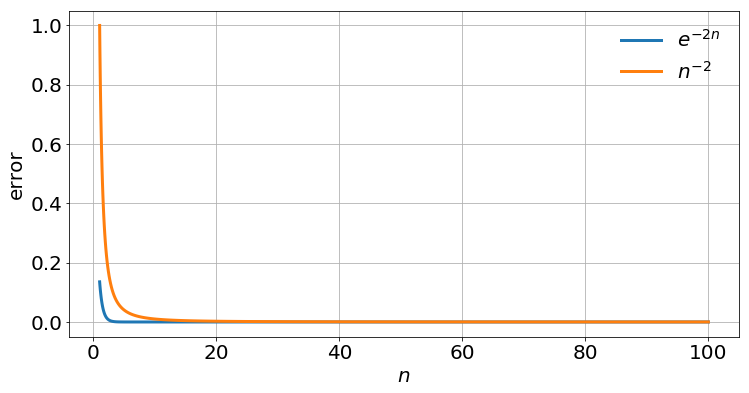

In [11]:
n = np.logspace(0, 2, 100) # evenly distribute numbers over logspace

error2e  = np.exp(-2*n)
error2 = 1 / n**2

p = plt.plot

p(n, error2e, label=r'$e^{-2n}$')
p(n, error2, label=r'$n^{-2}$')

plt.xlabel('$n$')
plt.ylabel('error')
plt.grid()
plt.legend(frameon=False)

# Number and Size of Transistors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Grab some data on transistor size/count

https://en.wikipedia.org/wiki/Transistor_count

In [2]:
from wikitables import import_tables
tables = import_tables('Transistor_count')
print(tables[0])

<WikiTable 'Transistor count[0]'>


## Parse it (ignore this if you wish)

This grabs the data from the Wikipedia article.

In [3]:
def getfloat(value):
    try:
        return float(value)
    except ValueError:
        return 0.0

table = tables[0]

years = [r['Date of introduction'].value for r in table.rows]
process = [r['Process'].value for r in table.rows]
process = [getfloat(p.split()[0].replace(',','')) if p != '' else 0 for p in process]
count = [r['Transistor count'].value for r in table.rows]
count = [c if type(c) is int else 0.0 if len(c.replace(',','').split()) == 0 else [float(di) for di in c.replace(',','').split() if di.isdigit()][0] for c in count]


years = np.array(years)
process = np.array(process)
count = np.array(count)

I = np.where((process!=0) & (count!=0))
years = years[I]
process = process[I]
count = count[I]

# Let's plot it!

## Is this the *best* way to display the data?
## What would you change?

Text(0,0.5,'nm')

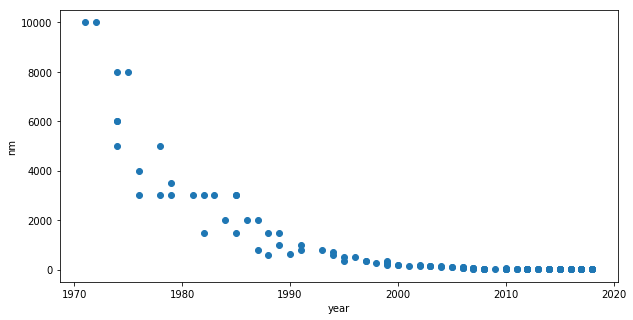

In [4]:
plt.figure(figsize=(10,5))
plt.plot(years, process, 'o')
plt.xlabel('year')
plt.ylabel('nm')

Text(0,0.5,'count')

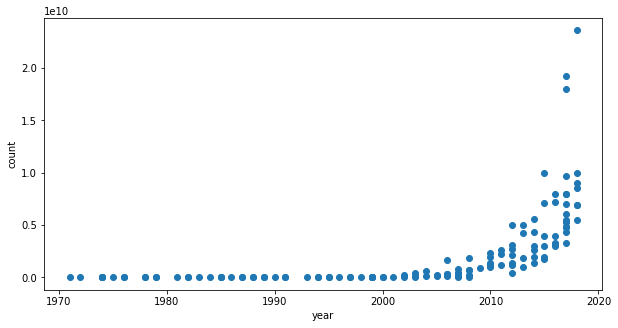

In [5]:
plt.figure(figsize=(10,5))
plt.plot(years, count, 'o') #, basey=2)
plt.xlabel('year')
plt.ylabel('count')

##  Add a slope line
see `polyfit`

Text(0,0.5,'count')

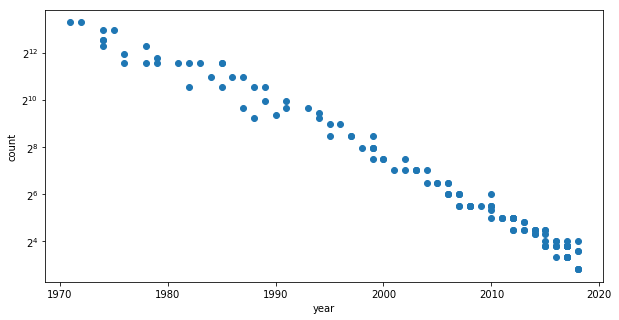

In [6]:
plt.figure(figsize=(10,5))
plt.semilogy(years, process, 'o', basey=2)
plt.xlabel('year')
plt.ylabel('count')

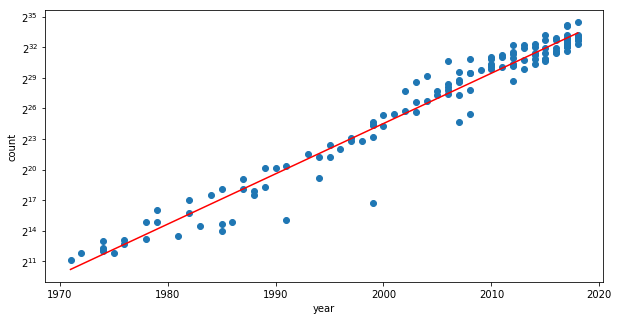

In [7]:
plt.figure(figsize=(10,5))
plt.semilogy(years, count, 'o', basey=2)
plt.xlabel('year')
plt.ylabel('count')

p = np.polyfit(years, np.log2(count), 1)
plt.plot(years, 2**(np.polyval(p, years)), 'r-')
#print(1 / p[0])

## Make it look nice ... with Seaborn

2.02342073473


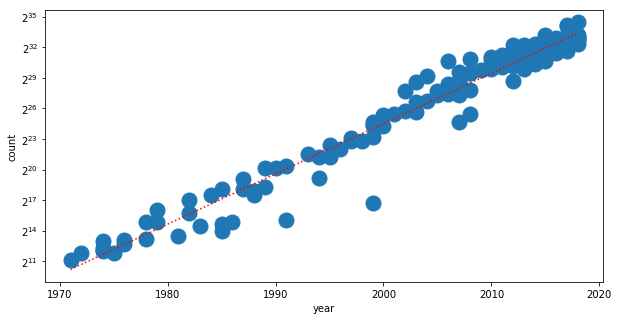

In [46]:
import seaborn as sns
plt.figure(figsize=(10,5))
plt.semilogy(years, count, 'o', basey=2, ms=15)
plt.xlabel('year')
plt.ylabel('count')

p = np.polyfit(years, np.log2(count), 1)
plt.plot(years, 2**(np.polyval(p, years)), color='r', ls=':')
print(1 / p[0])

## increase the font, make a light background

2.02342073473


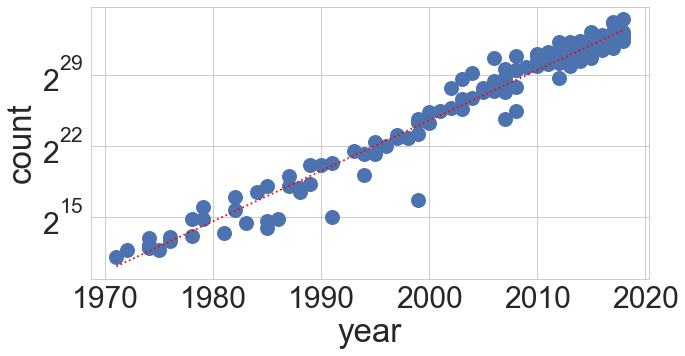

In [47]:
import seaborn as sns
sns.set(font_scale=3)
sns.set_style("whitegrid") 
plt.figure(figsize=(10,5))
plt.semilogy(years, count, 'o', basey=2, ms=15)
plt.xlabel('year')
plt.ylabel('count')

p = np.polyfit(years, np.log2(count), 1)
plt.plot(years, 2**(np.polyval(p, years)), color='r', ls=':')
print(1 / p[0])

## Reset the tick marks

[  8.00000000e+00   1.02400000e+03   1.31072000e+05   1.67772160e+07
   2.14748365e+09   2.74877907e+11   3.51843721e+13]
2.02342073473


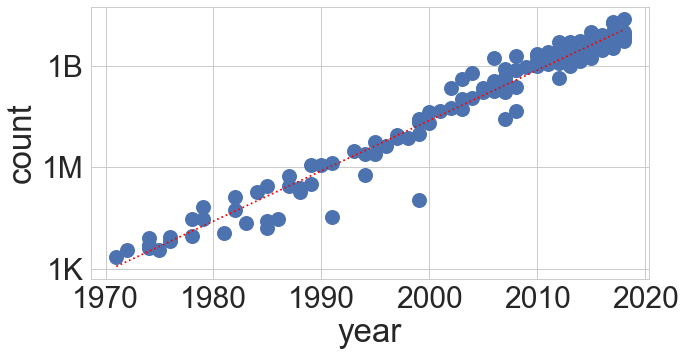

In [48]:
import seaborn as sns
sns.set(font_scale=3)
sns.set_style("whitegrid") 
plt.figure(figsize=(10,5))
plt.semilogy(years, count, 'o', basey=2, ms=15)
plt.xlabel('year')
plt.ylabel('count')

torig = plt.gca().get_yticks()
print(torig)
tnew = [1, 1000, np.int(1e6), np.int(1e9)]
tnewlabel = ['1', '1K', '1M', '1B']
plt.yticks(tnew, tnewlabel)


p = np.polyfit(years, np.log2(count), 1)
plt.plot(years, 2**(np.polyval(p, years)), color='r', ls=':')
print(1 / p[0])